In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | ifanadiana
Processing Record 3 of Set 1 | aksu
Processing Record 4 of Set 1 | margate
Processing Record 5 of Set 1 | avera
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | gurupa
Processing Record 13 of Set 1 | smithers
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | opoczno
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | lohja
Processing Record 23 of Set 1 | taguatinga

Processing Record 39 of Set 4 | karamea
City not found. Skipping...
Processing Record 40 of Set 4 | timaru
Processing Record 41 of Set 4 | dwarka
Processing Record 42 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 4 | santa isabel do rio negro
Processing Record 44 of Set 4 | floro
Processing Record 45 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 4 | kodinsk
Processing Record 47 of Set 4 | port hedland
Processing Record 48 of Set 4 | ayan
Processing Record 49 of Set 4 | nicoya
Processing Record 50 of Set 4 | kodiak
Processing Record 1 of Set 5 | gimli
Processing Record 2 of Set 5 | acarau
Processing Record 3 of Set 5 | bontang
Processing Record 4 of Set 5 | mzimba
Processing Record 5 of Set 5 | morant bay
Processing Record 6 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 7 of Set 5 | qui nhon
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | whittlesea
Processing Record 10 of Set 5 |

Processing Record 25 of Set 8 | saint-jean-de-luz
Processing Record 26 of Set 8 | dunedin
Processing Record 27 of Set 8 | batagay-alyta
Processing Record 28 of Set 8 | ust-kuyga
Processing Record 29 of Set 8 | nyurba
Processing Record 30 of Set 8 | mweka
Processing Record 31 of Set 8 | simav
Processing Record 32 of Set 8 | bend
Processing Record 33 of Set 8 | bilma
Processing Record 34 of Set 8 | nemuro
Processing Record 35 of Set 8 | djougou
Processing Record 36 of Set 8 | wilmington
Processing Record 37 of Set 8 | benghazi
Processing Record 38 of Set 8 | leningradskiy
Processing Record 39 of Set 8 | pumiao
Processing Record 40 of Set 8 | juneau
Processing Record 41 of Set 8 | takoradi
Processing Record 42 of Set 8 | svetlopolyansk
Processing Record 43 of Set 8 | kaeo
Processing Record 44 of Set 8 | ejea de los caballeros
Processing Record 45 of Set 8 | ban nahin
Processing Record 46 of Set 8 | amderma
City not found. Skipping...
Processing Record 47 of Set 8 | nagaoka
Processing Reco

Processing Record 13 of Set 12 | japura
Processing Record 14 of Set 12 | sinnamary
Processing Record 15 of Set 12 | cicero dantas
Processing Record 16 of Set 12 | sahrak
City not found. Skipping...
Processing Record 17 of Set 12 | barela
Processing Record 18 of Set 12 | rambouillet
Processing Record 19 of Set 12 | lillooet
Processing Record 20 of Set 12 | kahului
Processing Record 21 of Set 12 | kyzyl-suu
Processing Record 22 of Set 12 | beloha
Processing Record 23 of Set 12 | qaqortoq
Processing Record 24 of Set 12 | pangoa
Processing Record 25 of Set 12 | gigante
Processing Record 26 of Set 12 | udachnyy
Processing Record 27 of Set 12 | point fortin
Processing Record 28 of Set 12 | narsaq
Processing Record 29 of Set 12 | abu samrah
Processing Record 30 of Set 12 | puerto cabezas
Processing Record 31 of Set 12 | eureka
Processing Record 32 of Set 12 | santiago tuxtla
Processing Record 33 of Set 12 | altay
Processing Record 34 of Set 12 | todi
Processing Record 35 of Set 12 | lingao
Pr

In [10]:
len(city_data)

593

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,36.63,66,100,19.51,CA,2021-09-21 17:32:07
1,Ifanadiana,-21.3000,47.6333,63.79,97,96,1.83,MG,2021-09-21 17:32:08
2,Aksu,41.1231,80.2644,73.36,21,0,3.87,CN,2021-09-21 17:35:36
3,Margate,51.3813,1.3862,64.69,69,55,7.31,GB,2021-09-21 17:38:16
4,Avera,33.1940,-82.5271,83.75,81,97,4.99,US,2021-09-21 17:35:42


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2021-09-21 17:32:07,69.4541,-133.0374,36.63,66,100,19.51
1,Ifanadiana,MG,2021-09-21 17:32:08,-21.3000,47.6333,63.79,97,96,1.83
2,Aksu,CN,2021-09-21 17:35:36,41.1231,80.2644,73.36,21,0,3.87
3,Margate,GB,2021-09-21 17:38:16,51.3813,1.3862,64.69,69,55,7.31
4,Avera,US,2021-09-21 17:35:42,33.1940,-82.5271,83.75,81,97,4.99


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
#import time
# Get today's date in seconds.
#today = time.strftime("%x")
#today

'09/21/21'

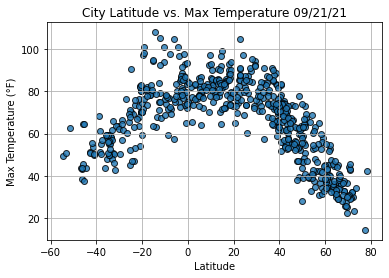

In [29]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temp,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

plt.savefig("weather_data/fig1.png")

plt.show()

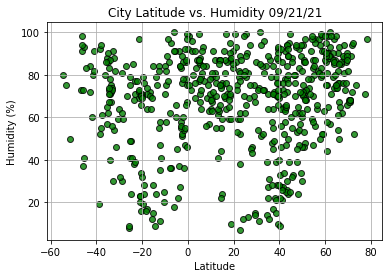

In [28]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", facecolor="green", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("weather_data/fig2.png")

plt.show()

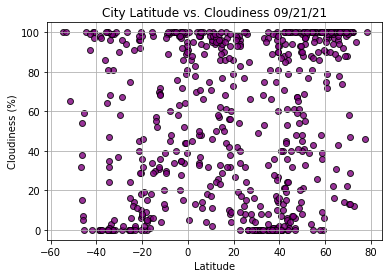

In [30]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", facecolor="purple", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("weather_data/fig3.png")

plt.show()

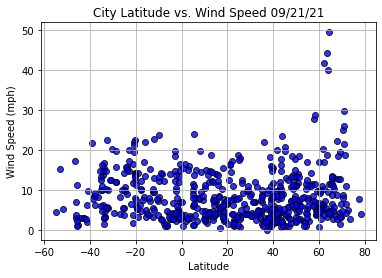

In [31]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", facecolor="blue", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("weather_data/fig4.png")

plt.show()